In [3]:
#Git Hub link:
#https://github.com/christacaggiano/machine_learning_exercises/blob/main/chest_pain_prediction.ipynb

import pandas as pd 
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.feature_selection import RFE, SelectKBest, f_classif, chi2, VarianceThreshold
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn import svm
from sklearn.svm import SVC
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers




In [4]:
cleanedDf = pd.read_csv("cleaned_SpanishData.csv", delimiter=",")
expressionData = pd.read_csv("cleaned_SpanishExpressionData.csv", delimiter=",")

In [3]:
cleanedDf

,!Sample_geo_accession,Gender,Age,Allergy,Asthma,Dermatitis,rhinitis
0,GSM4210053,0,48.390000,0,0,0,0
1,GSM4210054,0,50.430000,0,0,0,0
2,GSM4210055,1,53.880904,0,0,0,0
3,GSM4210056,0,52.665298,1,1,0,0
4,GSM4210057,1,53.650924,0,0,0,0
...,...,...,...,...,...,...,...
196,GSM4210249,1,55.162218,1,0,1,0
197,GSM4210250,0,47.460000,0,0,0,0
198,GSM4210251,0,47.610000,1,1,1,0
199,GSM4210252,1,48.030000,0,0,0,0


In [4]:
expressionData.head()

,TC01000001.hg.1,TC01000002.hg.1,TC01000003.hg.1,TC01000004.hg.1,TC01000005.hg.1,TC01000006.hg.1,TC01000007.hg.1,TC01000008.hg.1,TC01000009.hg.1,TC01000010.hg.1,...,TCUn_gl000228000012.hg.1,TCUn_gl000228000013.hg.1,TCUn_gl000228000014.hg.1,TCUn_gl000237000001.hg.1,TCUn_gl000237000002.hg.1,TCUn_gl000241000001.hg.1,TCUn_gl000241000002.hg.1,TCUn_gl000243000001.hg.1,TCUn_gl000243000002.hg.1,TCUn_gl000247000001.hg.1
0,7.306521,3.872354,2.316856,5.257580,10.443235,12.400564,12.726936,8.267809,1.364667,2.774485,...,2.472133,5.958601,5.052269,5.708536,5.656193,5.698558,5.689048,6.115806,6.715135,6.115806
1,6.447310,4.230636,2.351660,4.136642,9.698942,12.010571,12.260004,7.199457,1.596095,3.157192,...,2.870586,6.009917,4.741401,5.771277,5.700213,5.641142,5.666386,4.556088,6.392481,4.556088
2,5.174195,4.093883,2.023151,4.514760,9.829755,12.060998,12.398072,7.549971,1.731998,2.496039,...,2.375494,6.088588,4.757923,5.629518,5.499724,5.615692,5.642813,6.957816,6.727878,6.957816
3,6.471684,4.100412,2.234162,5.362035,10.213408,12.201899,12.481544,7.548271,1.434883,2.553943,...,2.596263,6.022447,5.058751,5.847535,5.838800,6.004944,6.079604,4.610122,6.656566,4.610122
4,5.607725,4.163153,2.006832,5.256249,10.372409,12.249870,12.609717,7.864405,1.705209,3.103833,...,2.688786,6.212327,5.410218,5.977947,5.835658,5.946795,5.934129,5.393630,6.797457,5.393630


In [18]:
y = cleanedDf["Allergy"].values
x = expressionData.values

In [19]:
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
x.shape

(201, 67528)

In [20]:
#KBest
selector = SelectKBest(f_classif, k=100)
x_new = selector.fit_transform(x, y)
index_list = selector.get_support(indices=True)
index_list
gene_ids = list(expressionData)
gene_names = [gene_ids[i] for i in index_list]

In [21]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.3, random_state=0)

[[0.46595102 0.47003218 0.26060814 ... 0.62989784 0.45373763 0.62989784]
 [0.35375325 0.49373186 0.52134879 ... 0.5800738  0.55200414 0.5800738 ]
 [0.08290661 0.57023707 0.33721669 ... 0.74517095 0.7313517  0.74517095]
 ...
 [0.30606922 0.34987111 0.29479869 ... 0.52564343 0.44596063 0.52564343]
 [0.49003642 0.47804604 0.57929422 ... 0.7404603  0.73018523 0.7404603 ]
 [0.17476691 0.38952279 0.10350054 ... 0.80815884 0.50147983 0.80815884]]


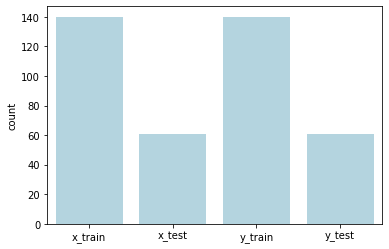

In [22]:
#plot training and testing data
sns.barplot(x=["x_train", "x_test", "y_train", "y_test"], 
            y=[len(x_train), len(x_test), len(y_train), len(y_test)],
           color="lightblue")
plt.ylabel("count")
print(x_train)
plt.show()


In [8]:
# define the parameter grid

"""scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

param_grid = {'C': [0.1, 1, 10, 100,1000],
              'kernel': ['linear', 'poly', 'rbf','sigmoid'],
              'gamma': [0.001,0.01,0.1, 1, 10, 100]}"""

# create the SVM model
model = SVC()

# create the grid search object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(x_train, y_train)

# print the best parameters
print(grid_search.best_params_)

{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}


In [16]:
x_test.shape

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [31]:
type(y_train[0])

numpy.int64

In [32]:
clf = svm.SVC()#C=0.1, gamma = 0.1, kernel = 'rbf')



In [33]:
clf.fit(x_train,y_train)

SVC()

In [34]:
x_train

array([[0.46595102, 0.47003218, 0.26060814, ..., 0.62989784, 0.45373763,
        0.62989784],
       [0.35375325, 0.49373186, 0.52134879, ..., 0.5800738 , 0.55200414,
        0.5800738 ],
       [0.08290661, 0.57023707, 0.33721669, ..., 0.74517095, 0.7313517 ,
        0.74517095],
       ...,
       [0.30606922, 0.34987111, 0.29479869, ..., 0.52564343, 0.44596063,
        0.52564343],
       [0.49003642, 0.47804604, 0.57929422, ..., 0.7404603 , 0.73018523,
        0.7404603 ],
       [0.17476691, 0.38952279, 0.10350054, ..., 0.80815884, 0.50147983,
        0.80815884]])

In [35]:
y_test

array([0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1])

In [36]:
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

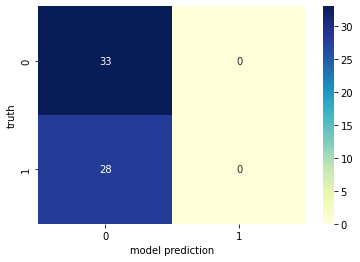

In [37]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred) 
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show() 

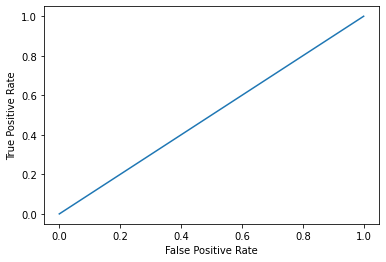

In [38]:
fpr, tpr, _ = roc_curve(y_test,  y_pred, pos_label=0)

plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70        61
           1       0.00      0.00      0.00         0

    accuracy                           0.54        61
   macro avg       0.50      0.27      0.35        61
weighted avg       1.00      0.54      0.70        61



/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

In [31]:
roc_auc_score(y_test, y_pred)

0.5